In [273]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution
from specs.dual_governance.state import State

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/pytho

In [274]:
path_to_runs = Path("../../results/simulations/rage_quit_loop/")
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve(), pass_directory_name=True)
timestep_data_df_full['run_id_str'] = timestep_data_df_full['run_id'].astype(str)

In [275]:
# sns.lineplot(data=timestep_data_df_full, x='timestep', y='actors_total_locked', hue='run_id')

In [276]:
start_data_df_full

,seed,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_funds,simulation_hash,determining_factor,lido_exit_share,churn_rate,timedelta_tick,n_actors,...,HonestActor,SingleAttacker,CoordinatedAttacker,Hacker,SingleDefender,CoordinatedDefender,directory_name,run_id,initial_total_balance,attacker_share
0,1888,0.01,0.1,1001111,c000bc0fd243250682a8725b331c9ad233812b33ba5acb...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_78f3a8a80b7683c4e5c595f5be5aa8b788d645ba...,0,18000000.0,0.055617
1,1888,0.01,0.1,4721604,9f8348239b9e0c5b21785f10627349fbb70b92b6635af1...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_78f3a8a80b7683c4e5c595f5be5aa8b788d645ba...,1,18000000.0,0.262311
2,1888,0.01,0.1,2112483,3713dcb3bce659ee735ca80420be007efe2704639463cc...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_78f3a8a80b7683c4e5c595f5be5aa8b788d645ba...,2,18000000.0,0.117360
3,1888,0.01,0.1,3347373,94e9af23d387e96c1b6290cb54dca1c50aeba0330d7ff4...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_78f3a8a80b7683c4e5c595f5be5aa8b788d645ba...,3,18000000.0,0.185965
4,1888,0.01,0.1,1001111,563af5ec65cac51d38f84f981ed20b7dbdcf439866ae0f...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_7642c03da69cea84b1efb3e44d8fa6150005f3b2...,4,4500000.0,0.222469
5,1888,0.01,0.1,4721604,fd2507b03ee4d2b66412874c4eb05c8a76fa02be1222cb...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_7642c03da69cea84b1efb3e44d8fa6150005f3b2...,5,4500000.0,1.049245
6,1888,0.01,0.1,2112483,3aa5066827d5a15495663904a7e1f017fc4815ee35ffff...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_7642c03da69cea84b1efb3e44d8fa6150005f3b2...,6,4500000.0,0.469441
7,1888,0.01,0.1,3347373,2209de19d9df7a9bfa400ee24d1bf95da9d6504b36f365...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_7642c03da69cea84b1efb3e44d8fa6150005f3b2...,7,4500000.0,0.743861
8,1888,0.01,0.1,1001111,aa2d06368572d901174d4ceb64143b9cc27ad1b0f8897e...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_f5ce718d233119bd3f0c1bb40546e257303a7ad8...,8,9000000.0,0.111235
9,1888,0.01,0.1,4721604,a0fb2009acc9aa12613969cc1d072631dccdf3e30ee6ed...,0,0.3,14,0 days 03:00:00,1986,...,1985,0,1,0,0,0,batch_f5ce718d233119bd3f0c1bb40546e257303a7ad8...,9,9000000.0,0.524623


In [277]:
timestep_data_df_full_with_params = timestep_data_df_full.merge(start_data_df_full, on='run_id')

In [278]:
def clean_timesteps(df):
    # Initialize a list to store the cleaned data
    cleaned_data = []

    # Group by 'run_id'
    for run_id, group in df.groupby('run_id'):
        # Reset index for the group
        group = group.reset_index(drop=True)
        
        # Initialize variables to track state
        current_state = None
        normal_episode_count = 0
        cleaned_group = []

        # Iterate over the rows in the group
        for index, row in group.iterrows():
            if row['dg_state_name'] != current_state:
                # State change detected
                current_state = row['dg_state_name']
                if current_state == 'Normal':
                    normal_episode_count += 1
                    if normal_episode_count >= 2:
                        # Stop processing after the second Normal episode
                        break

            # Append the row to cleaned data
            cleaned_group.append(row)

        # Extend the cleaned data with the current group
        cleaned_data.extend(cleaned_group)

    # Convert cleaned data to a DataFrame
    return pd.DataFrame(cleaned_data)

# Preprocess the data
cleaned_timestep_data_df = clean_timesteps(timestep_data_df_full_with_params)

In [279]:
state_timesteps_df = cleaned_timestep_data_df.groupby(['run_id', 'dg_state_name']).size().unstack(fill_value=0)
state_timesteps_df *= 3 / 24
print('Days in each state for each run')
state_timesteps_df

Days in each state for each run


dg_state_name,Normal,RageQuit,VetoCooldown,VetoSignalling
run_id,,,,
0,0.625,65.375,0.25,45.000
1,0.625,804.500,3.25,631.625
2,0.625,306.875,1.25,225.500
3,0.625,804.500,3.25,631.625
4,0.625,20.375,0.25,45.000
5,0.625,405.500,5.50,1028.375
6,0.625,59.625,0.75,135.250
7,0.625,155.750,2.00,360.875
8,0.625,35.375,0.25,45.000


In [280]:
def count_ragequit_episodes(df):
    # Initialize a list to store the results
    results = []

    # Group by 'run_id'
    for run_id, group in df.groupby('run_id'):
        # Reset index for the group
        group = group.reset_index(drop=True)
        
        # Initialize variables to track episodes
        in_episode = False
        episode_count = 0

        # Iterate over the rows in the group
        for index, row in group.iterrows():
            if row['dg_state_name'] == 'RageQuit':
                if not in_episode:
                    # Start of a new episode
                    in_episode = True
                    episode_count += 1
            else:
                # End of an episode
                in_episode = False

        # Append the result for this run_id
        results.append({'run_id': run_id, 'ragequit_episodes': episode_count})

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Apply the function to your DataFrame
ragequit_episodes_df = count_ragequit_episodes(cleaned_timestep_data_df)

# Display the result
print(ragequit_episodes_df)

    run_id  ragequit_episodes
0        0                  1
1        1                 14
2        2                  5
3        3                 14
4        4                  1
5        5                 22
6        6                  3
7        7                  8
8        8                  1
9        9                 19
10      10                 10
11      11                  4


In [281]:
starting_balances = timestep_data_df_full_with_params[timestep_data_df_full_with_params['timestep'] == 1].groupby('run_id')['actors_total_balance'].sum()
state_timesteps_df = state_timesteps_df.merge(starting_balances, on='run_id')

In [282]:
print('Days in each state for each run, number of RageQuit events')
state_timesteps_df = state_timesteps_df.merge(ragequit_episodes_df, on='run_id').merge(start_data_df_full[['run_id', 'attacker_funds', 'lido_exit_share']], on='run_id')
state_timesteps_df['attacker_share'] = state_timesteps_df['attacker_funds'] / (state_timesteps_df['attacker_funds'] + 9000000)
state_timesteps_df = state_timesteps_df.set_index(['attacker_share', 'lido_exit_share', 'actors_total_balance']).sort_index()
# state_timesteps_df['attacker_share'] = [0.1, 0.19, 0.271, 0.344]
state_timesteps_df

Days in each state for each run, number of RageQuit events


run_id  Normal  RageQuit  \
attacker_share lido_exit_share actors_total_balance                             
0.1001         0.3             4500000.0                  4   0.625    20.375   
                               9000000.0                  8   0.625    35.375   
                               18000000.0                 0   0.625    65.375   
0.1901         0.3             4500000.0                  6   0.625    59.625   
                               9000000.0                 11   0.625   135.250   
                               18000000.0                 2   0.625   306.875   
0.2711         0.3             4500000.0                  7   0.625   155.750   
                               9000000.0                 10   0.625   329.000   
                               18000000.0                 3   0.625   804.500   
0.3441         0.3             4500000.0                  5   0.625   405.500   
                               9000000.0                  9   0.625   577.625   
                               18000000.0                 1   0.625   804.500   

                                                     VetoCooldown  \
attacker_share lido_exit_share actors_total_balance                 
0.1001         0.3             4500000.0                     0.25   
                               9000000.0                     0.25   
                               18000000.0                    0.25   
0.1901         0.3             4500000.0                     0.75   
                               9000000.0                     1.00   
                               18000000.0                    1.25   
0.2711         0.3             4500000.0                     2.00   
                               9000000.0                     2.50   
                               18000000.0                    3.25   
0.3441         0.3             4500000.0                     5.50   
                               9000000.0                     4.50   
                               18000000.0                    3.25   

                                                     VetoSignalling  \
attacker_share lido_exit_share actors_total_balance                   
0.1001         0.3             4500000.0                     45.000   
                               9000000.0                     45.000   
                               18000000.0                    45.000   
0.1901         0.3             4500000.0                    135.250   
                               9000000.0                    180.375   
                               18000000.0                   225.500   
0.2711         0.3             4500000.0                    360.875   
                               9000000.0                    451.125   
                               18000000.0                   631.625   
0.3441         0.3             4500000.0                   1028.375   
                               9000000.0                    857.250   
                               18000000.0                   631.625   

                                                     ragequit_episodes  \
attacker_share lido_exit_share actors_total_balance                      
0.1001         0.3             4500000.0                             1   
                               9000000.0                             1   
                               18000000.0                            1   
0.1901         0.3             4500000.0                             3   
                               9000000.0                             4   
                               18000000.0                            5   
0.2711         0.3             4500000.0                             8   
                               9000000.0                            10   
                               18000000.0                           14   
0.3441         0.3             4500000.0                            22   
                               9000000.0                            

In [293]:
import pandas as pd

def calculate_state_durations(df):
    # Initialize a list to store the results
    results = []

    # Group by 'run_id'
    for run_id, group in df.groupby('run_id'):
        # Reset index for the group
        group = group.reset_index(drop=True)
        
        # Initialize variables to track state durations
        current_state = None
        state_duration = 0

        # Iterate over the rows in the group
        for index, row in group.iterrows():
            if row['dg_state_name'] == current_state:
                # Continue the current state
                state_duration += 1
            else:
                # If a state change occurs, record the previous state duration
                if current_state is not None:
                    results.append({
                        'run_id': run_id,
                        'state': current_state,
                        'duration': state_duration
                    })
                # Start a new state
                current_state = row['dg_state_name']
                state_duration = 1

        # Append the last state duration for the group
        if current_state is not None:
            results.append({
                'run_id': run_id,
                'state': current_state,
                'duration': state_duration
            })

    # Convert results to a DataFrame
    return pd.DataFrame(results)

# Apply the function to your DataFrame
state_durations_df = calculate_state_durations(cleaned_timestep_data_df)

state_durations_df['duration_days'] = state_durations_df['duration'] * 3 / 24

# Display the result
run_id = 2
print(f'Example run with RageQuit Loop, where attackers have {state_timesteps_df[state_timesteps_df.run_id == run_id].index.get_level_values(0).values[0]:.3f} share of total pool')
state_durations_df[state_durations_df['run_id'] == run_id]

Example run with RageQuit Loop, where attackers have 0.190 share of total pool


,run_id,state,duration,duration_days
46,2,Normal,5,0.625
47,2,VetoSignalling,360,45.000
48,2,RageQuit,523,65.375
49,2,VetoCooldown,2,0.250
50,2,VetoSignalling,361,45.125
51,2,RageQuit,477,59.625
52,2,VetoCooldown,2,0.250
53,2,VetoSignalling,361,45.125
54,2,RageQuit,485,60.625
55,2,VetoCooldown,2,0.250


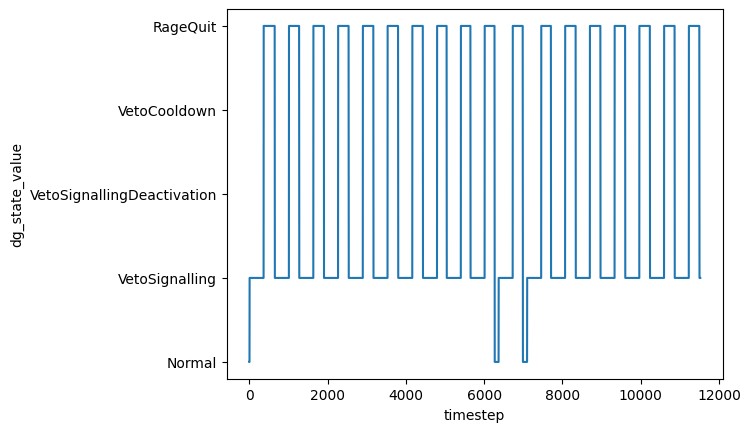

In [292]:
sns.lineplot(data=timestep_data_df_full[timestep_data_df_full['run_id'] == 10], x='timestep', y='dg_state_value')
plt.yticks([1,2,3,4,5])
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{State(x).name}'))


<Axes: xlabel='timestep', ylabel='dg_state_value'>

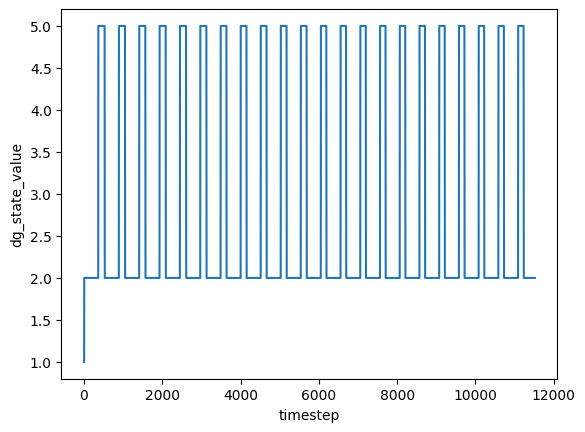

In [287]:
sns.lineplot(data=timestep_data_df_full[timestep_data_df_full['run_id'] == 5], x='timestep', y='dg_state_value')